# 6.5. Looking at different performance evaluation metrics


## Source:
New part
* [Looking at different performance evaluation metrics](https://render.githubusercontent.com/view/ipynb?commit=1b01e733d15a1808ebdb0e07e46dbb9cb1634323&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f72617362742f707974686f6e2d6d616368696e652d6c6561726e696e672d626f6f6b2d326e642d65646974696f6e2f316230316537333364313561313830386562646230653037653436646262396362313633343332332f636f64652f636830362f636830362e6970796e62&nwo=rasbt%2Fpython-machine-learning-book-2nd-edition&path=code%2Fch06%2Fch06.ipynb&repository_id=81413897&repository_type=Repository#Looking-at-different-performance-evaluation-metrics)

Related parts

## Code

### Load the Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Fetch the dataset
url2breast_cancer_wisconsin_dataset='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
url2dataset = url2breast_cancer_wisconsin_dataset
df = pd.read_csv( url2dataset, header=None )

# Get the actual data & label from the dataset
X = df.loc[:, 2:].values  # actual data
y = df.loc[:, 1].values   # label

# Encode B to 0 and M to 1
le = LabelEncoder()
y  = le.fit_transform(y)

# Split the dataset to train & test data
test_over_train_ratio = 0.2
random_seed = 1
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=test_over_train_ratio, stratify=y, random_state=random_seed)

### Prepare the Model

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  # Support Vector Machine, Support Vector Classifier

pipe_svc = make_pipeline( StandardScaler(), SVC(random_state=1) )

### Train the Model

In [3]:
pipe_svc.fit( X_train, y_train )
y_pred = pipe_svc.predict( X_test )

### Get the Confusion Matrix

In [5]:
from sklearn.metrics import confusion_matrix

confmat = confusion_matrix( y_true=y_test, y_pred=y_pred )
print( confmat )

[[71  1]
 [ 2 40]]


### Plot the Confusion Matrix

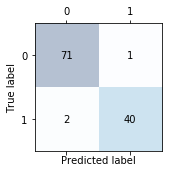

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots( figsize=(2.5, 2.5) )
ax.matshow( confmat, cmap=plt.cm.Blues, alpha=0.3 )
for i in range( confmat.shape[0] ):
    for j in range( confmat.shape[1] ):
        ax.text( x=j, y=i,
                 s=confmat[i,j],
                 va='center', ha='center'
               )
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()
plt.show()

(EOF)